In [251]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import scale, normalize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Why PCA?
Principle Component Analysis is an unsupervised Machine Learning algorithm that is used to reduce the dimension of the datasets. Let's consider the dimensionality reduction for the case of MNIST dataset. Each of the individual image of the MNIST dataset is 28x28 = 784 pixel. Not all the pixel of these image provide usefull information. For example, 4 corner pixel of each image is always off. These 4 pixel doesn't provide any usefull information. Even if we remove these 4 pixel we won't lose any significant information but we will reduce the dimension of the data. After reducing these 4 pixel our new dataset have 780 pixel. Infact we can remove more pixel without losing any significant information. Removing these redundant dimensions makes the training process significantly faster.

We were able to remove those 4 corner pixels because those pixels values didn't change throughout the image. In other words, there was no variance on those pixels(dimensions). So if we want to remove more dimension we have to find out the dimension where we have the least amount of variance. Figure 2 shows an example of how many dimensions we will need to represent our data completely. If all the dimensions(784) are used then no information is loosed which is obvious. And we are not loosing any significant information until we throughout ~400 dimension. In these ~400 dimension our data varies to little that we can ignore these dimensions. And by ignoring these dimesions our dataset is almost half. And we are only dealing with the dimensions that have the relevant information. Now the quesion is how would we know on which dimension our data vary and which dimension data doesn't vary? And the obvious answare is PCA. PCA will help us identify the most important dimension on the dataset.
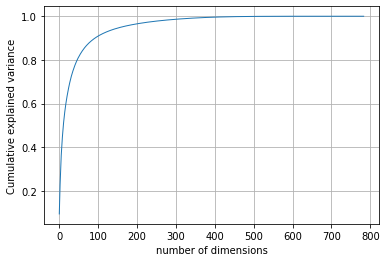

It's hard to visuzalize the 784 dimensions dataset. Our human brain can not even project the data which have more than 3 dimensions. For better visualization purposes let's not work with the MNIST dataset. Instead let's work with the toy dataset which is two dimensions. 

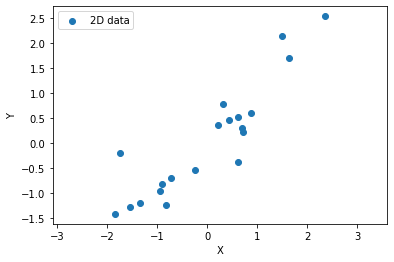

In [399]:
np.random.seed(102)
x = np.random.multivariate_normal([0, 0], [[1, .9], [.9, 1]], size=20).T
plt.axis('equal')
plt.scatter(x[0], x[1], label="2D data")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

We want to convert this 2D data into 1D data by loosing as less information as possible. One possible way might be projecting all the points on the X-axis. And consider the projected points as the new data points. So the point `[-1.875, -1.29]` will become `[-1.875]`. Because the projection on the x-axis is just the X-coordiante value. But in these process we just lost all the information available on y-axis. And if the data is projected on Y-axis then we will loose all the information avaible on X-axis. 

In [401]:
np.cov(x)

array([[1.41195704, 1.22429704],
       [1.22429704, 1.30130837]])

In [409]:
np.var(x[0], x[0])

TypeError: only integer scalar arrays can be converted to a scalar index

In [299]:
x

array([[-2.76657624, -1.02069914, -0.51672749,  0.6129334 ,  1.68055536,
        -0.31541821,  0.06096433,  0.58333117, -0.8067414 , -2.68838212,
        -0.82273587,  1.98508097,  0.00442539, -0.21668425, -0.78932899,
        -0.71024988,  0.71005206,  0.74170197, -0.49060678, -0.85730396],
       [-2.36931023, -0.70205176, -0.71868195,  0.99617954,  2.14864965,
        -0.68793485, -0.4189885 ,  1.18736195,  0.44473462, -2.25609315,
         0.24846856,  1.25198948,  0.25141689, -0.09999503, -0.74318524,
        -0.50176326,  0.23313651,  1.04828583,  0.71216857,  0.40548982]])

### Linear projection

import sklearn.datasets

In [396]:
def get_projection(axis=[1, 1], seed=100):
    axis = np.array(axis).reshape((1, 2))
    axis_normalized = normalize(axis).reshape((1, 2))
    np.random.seed(seed)
    x = np.random.multivariate_normal([0, 0], [[1, .9], [.9, 1]], size=20).T
    plt.scatter(x[0], x[1], label="2D data")
    # get projection
    projection = axis_normalized.T.dot(axis_normalized.dot(x))
    plt.scatter(projection[0], projection[1], marker="x", c='g', label="1D data")
    plt.plot([projection[0], x[0]], [projection[1], x[1]], 'r-', lw=1)
    plt.axis('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    # Plotting x axis and y axis
    plt.plot(range(-2, 4) * axis_normalized[0][0], range(-2, 4) * axis_normalized[0][1], 'k-', lw=1)
    plt.legend()
    plt.show()

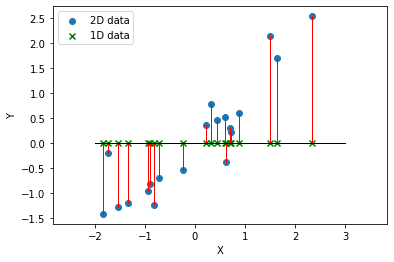

In [397]:
get_projection(axis=[1, 0], seed=102)

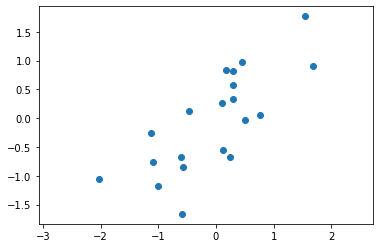

In [360]:
np.random.seed(100)
x = np.random.multivariate_normal([0, 0], [[1, .8], [.8, 1]], size=20).T
plt.axis('equal')
plt.scatter(x[0], x[1])
plt.show()

In [216]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data

In [227]:
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
x = normalize(x)
pca = PCA()
pca_data = pca.fit_transform(x)

In [228]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

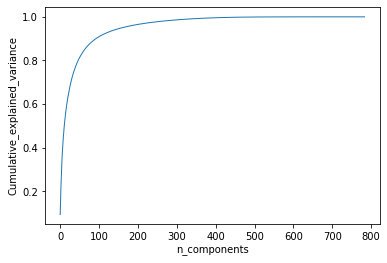

In [241]:
plt.plot(cum_var_explained, linewidth=1)
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

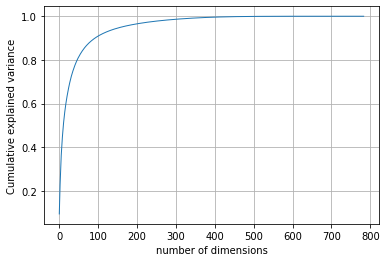

In [246]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=1)
plt.grid()
plt.xlabel('number of dimensions')
plt.ylabel('Cumulative explained variance')
plt.show()

In [247]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09412583, 0.16734156, 0.22602708, 0.27567637, 0.32222501,
       0.36309903, 0.39398374, 0.42261568, 0.44761319, 0.47075055,
       0.49210317, 0.51138214, 0.52884589, 0.54517984, 0.56038665,
       0.5748189 , 0.58780812, 0.60028992, 0.61209286, 0.62315569,
       0.63361993, 0.64370222, 0.65337876, 0.6626639 , 0.67178727,
       0.68057348, 0.68861946, 0.69658743, 0.70416074, 0.71153487,
       0.71845974, 0.72522828, 0.73145203, 0.73738248, 0.74321955,
       0.74893311, 0.75431368, 0.75963573, 0.76472087, 0.7696761 ,
       0.77442377, 0.77905579, 0.78344447, 0.7877065 , 0.79189954,
       0.79603811, 0.79993558, 0.80367023, 0.8073251 , 0.81071456,
       0.81406227, 0.8173644 , 0.82054153, 0.82363098, 0.82666784,
       0.8296203 , 0.83251858, 0.8353293 , 0.83806716, 0.84071571,
       0.84330883, 0.84586471, 0.84835657, 0.85076268, 0.8531224 ,
       0.85541002, 0.85762546, 0.85977709, 0.86187103, 0.86394892,
       0.86592939, 0.86788861, 0.86979492, 0.87167454, 0.87347

In [248]:
pca.explained_variance_ratio_

array([9.41258263e-02, 7.32157350e-02, 5.86855182e-02, 4.96492927e-02,
       4.65486378e-02, 4.08740160e-02, 3.08847133e-02, 2.86319390e-02,
       2.49975166e-02, 2.31373539e-02, 2.13526177e-02, 1.92789746e-02,
       1.74637446e-02, 1.63339577e-02, 1.52068042e-02, 1.44322562e-02,
       1.29892138e-02, 1.24818045e-02, 1.18029390e-02, 1.10628333e-02,
       1.04642341e-02, 1.00822898e-02, 9.67653875e-03, 9.28514748e-03,
       9.12336664e-03, 8.78620478e-03, 8.04598151e-03, 7.96796780e-03,
       7.57331708e-03, 7.37412778e-03, 6.92487303e-03, 6.76854085e-03,
       6.22374095e-03, 5.93045267e-03, 5.83707501e-03, 5.71355261e-03,
       5.38057126e-03, 5.32204856e-03, 5.08514237e-03, 4.95523335e-03,
       4.74766779e-03, 4.63201759e-03, 4.38868390e-03, 4.26202605e-03,
       4.19304232e-03, 4.13857002e-03, 3.89747072e-03, 3.73465320e-03,
       3.65486982e-03, 3.38945330e-03, 3.34771386e-03, 3.30213179e-03,
       3.17712598e-03, 3.08944862e-03, 3.03686113e-03, 2.95245946e-03,
      